In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("dataset.csv")

### Shape of Data

In [ ]:
data.shape

(1000, 5)

## Let's Explore the data

In [ ]:
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,100.496714,1.0,98.701499,100.448329,25.2
1,99.861736,1.0,99.127991,102.162850,25.2
2,100.647689,1.0,98.180381,105.513263,75.6
3,101.523030,1.0,98.042669,100.718009,63.0
4,99.765847,1.0,99.127834,100.362979,37.8


### Basic information about the dataset and data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


### Summary statistics

In [ ]:
data.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
count,1000.000000,1000.0,1000.000000,1000.000000,1000.000000
mean,100.019332,1.0,97.964468,101.957291,62.218800
std,0.979216,0.0,1.441786,1.355439,27.492602
min,96.758733,1.0,86.389767,100.030298,0.000000
25%,99.352410,1.0,97.318889,100.978539,37.800000
50%,100.025301,1.0,98.270741,101.654347,63.000000
75%,100.647944,1.0,99.016944,102.659764,75.600000
max,103.852731,1.0,99.974140,110.337932,176.400000


### Missing values

In [ ]:
data.isnull().sum()

Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
dtype: int64

## Check Duplicates

In [ ]:
data.duplicated().sum()

0

## Distribution

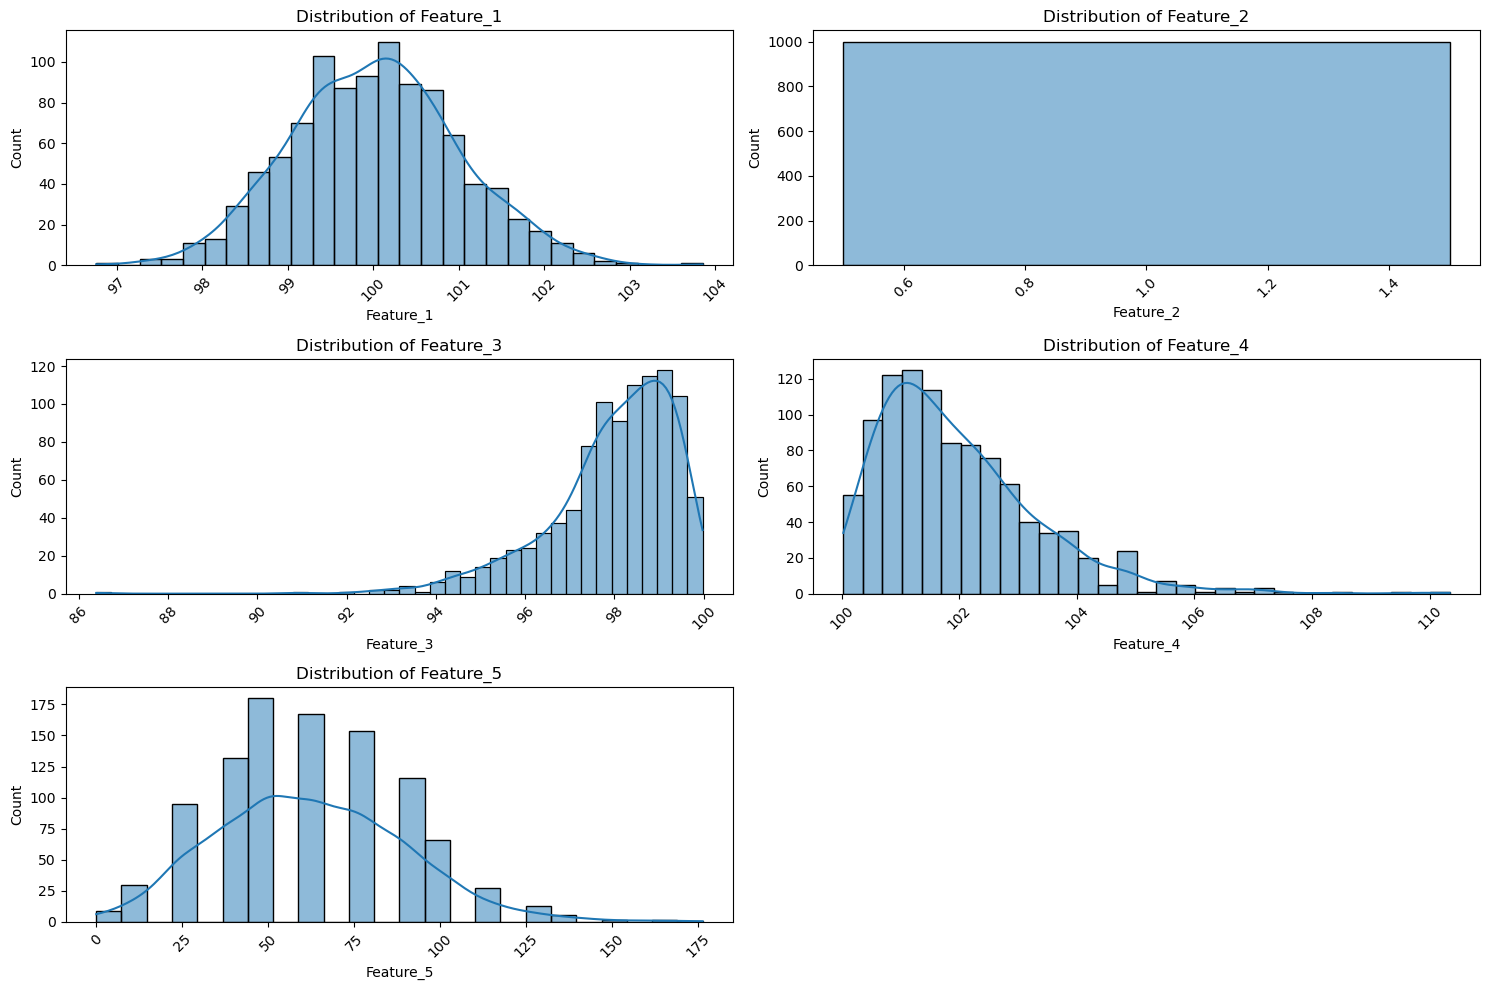

In [ ]:
plt.figure(figsize=(15, 10))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#### Normalized Distribution (Gaussian)

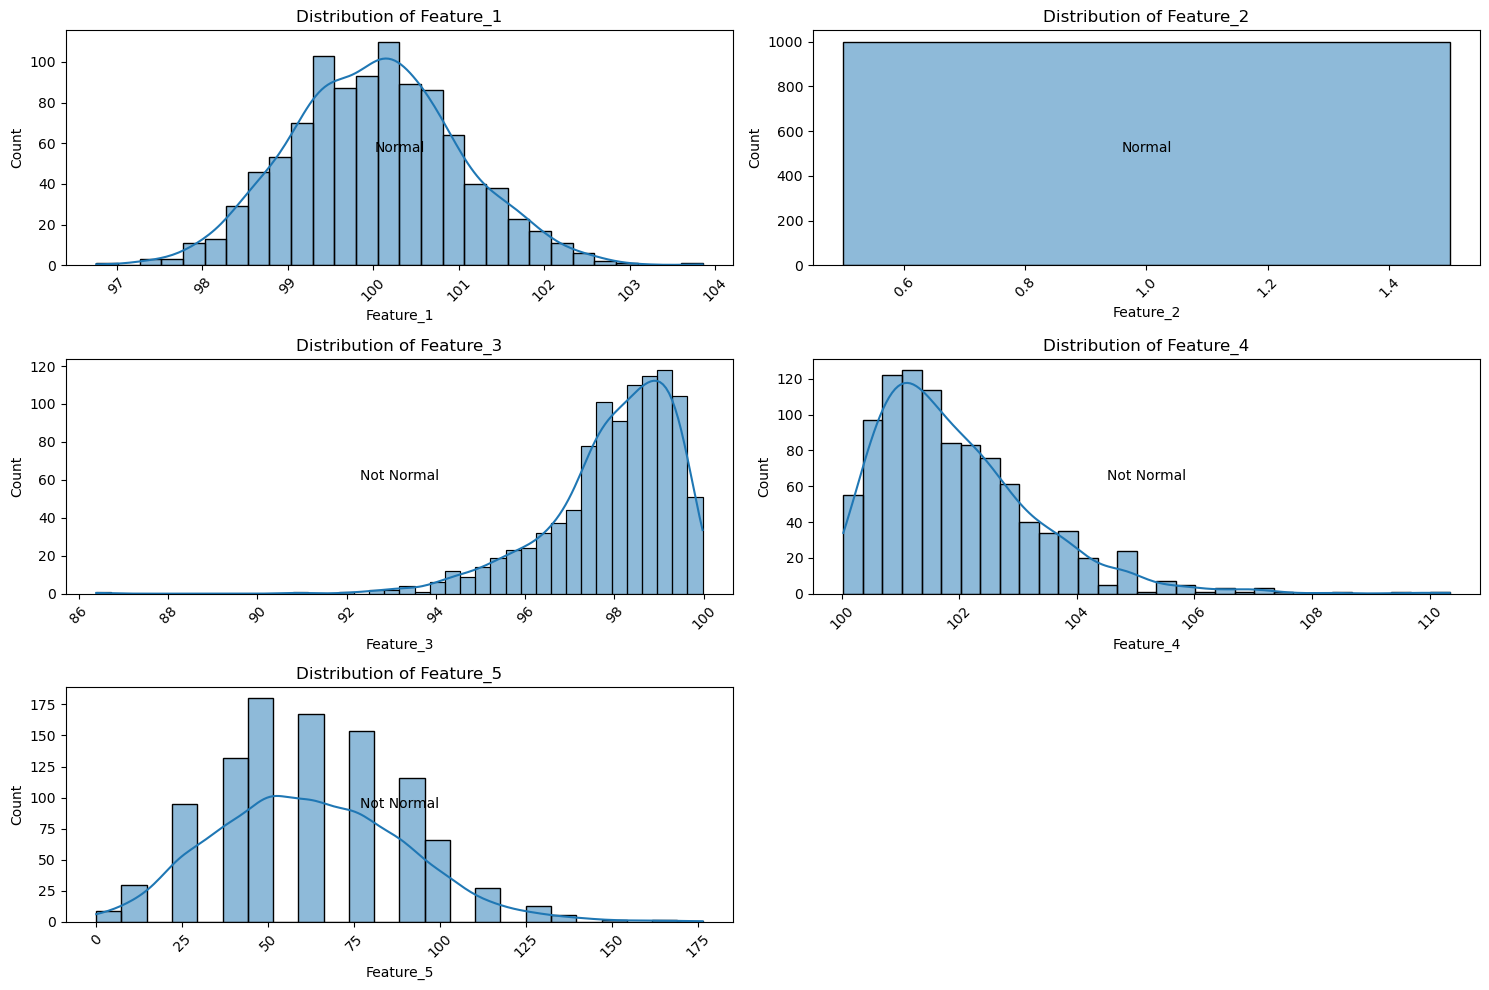

In [ ]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(data[column])
    if p < 0.05:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Uniform Distribution

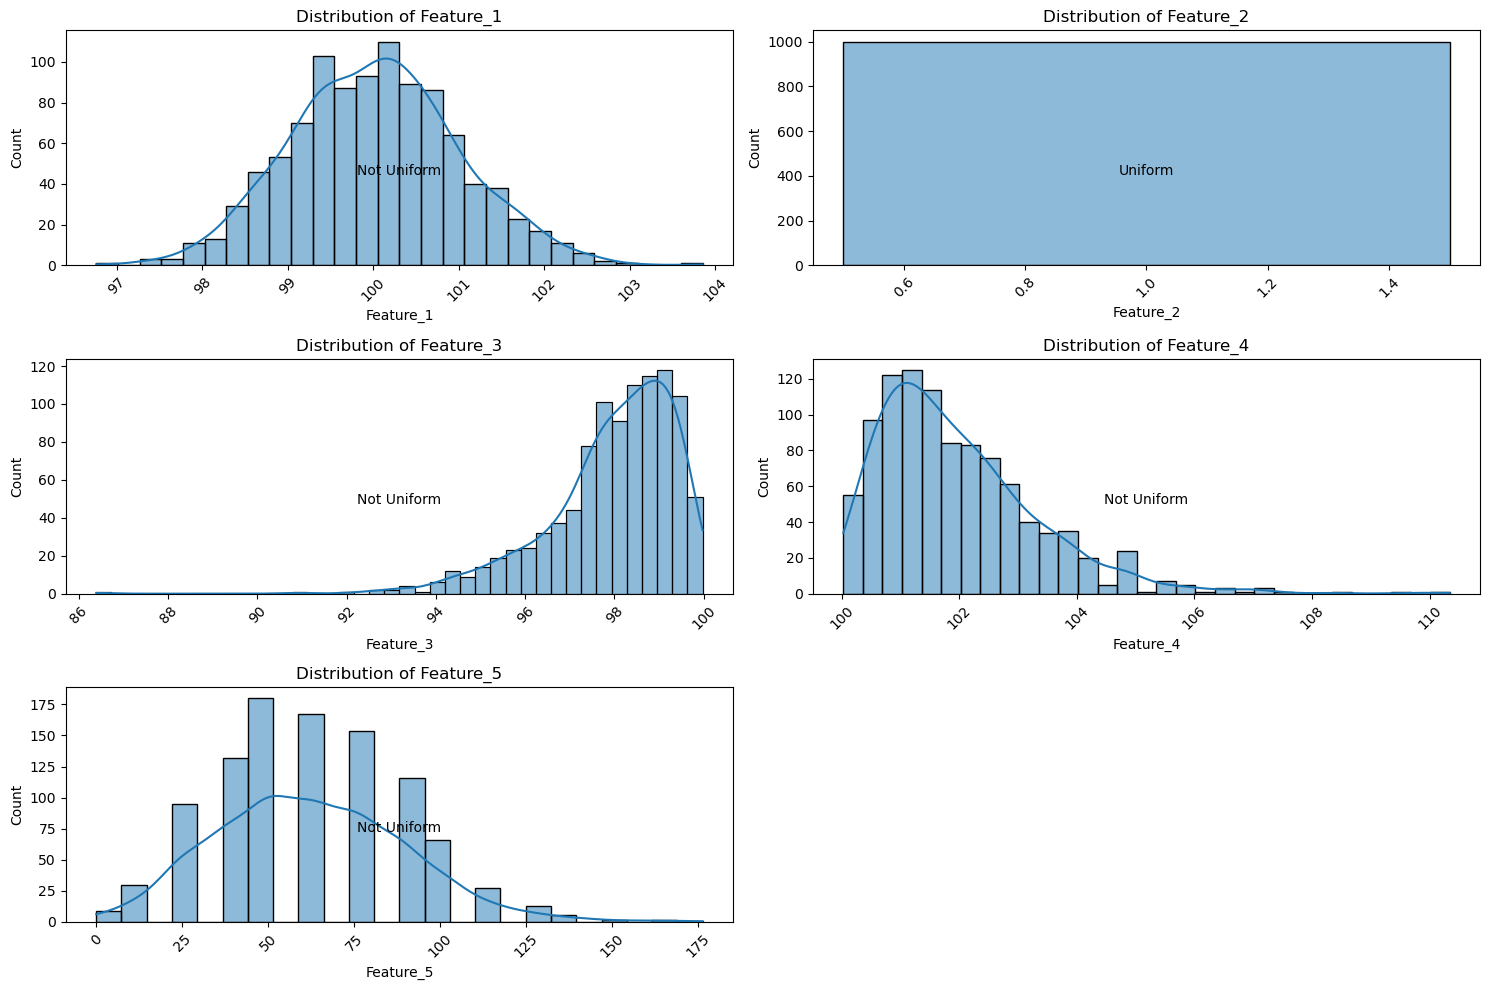

In [ ]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Add additional analysis to detect distribution type
    # Check for uniform distribution
    min_val = data[column].min()
    max_val = data[column].max()
    if max_val - min_val < 1e-6:
        plt.text(0.5, 0.4, "Uniform", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.4, "Not Uniform", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Skewed Distribution (negative and positive)


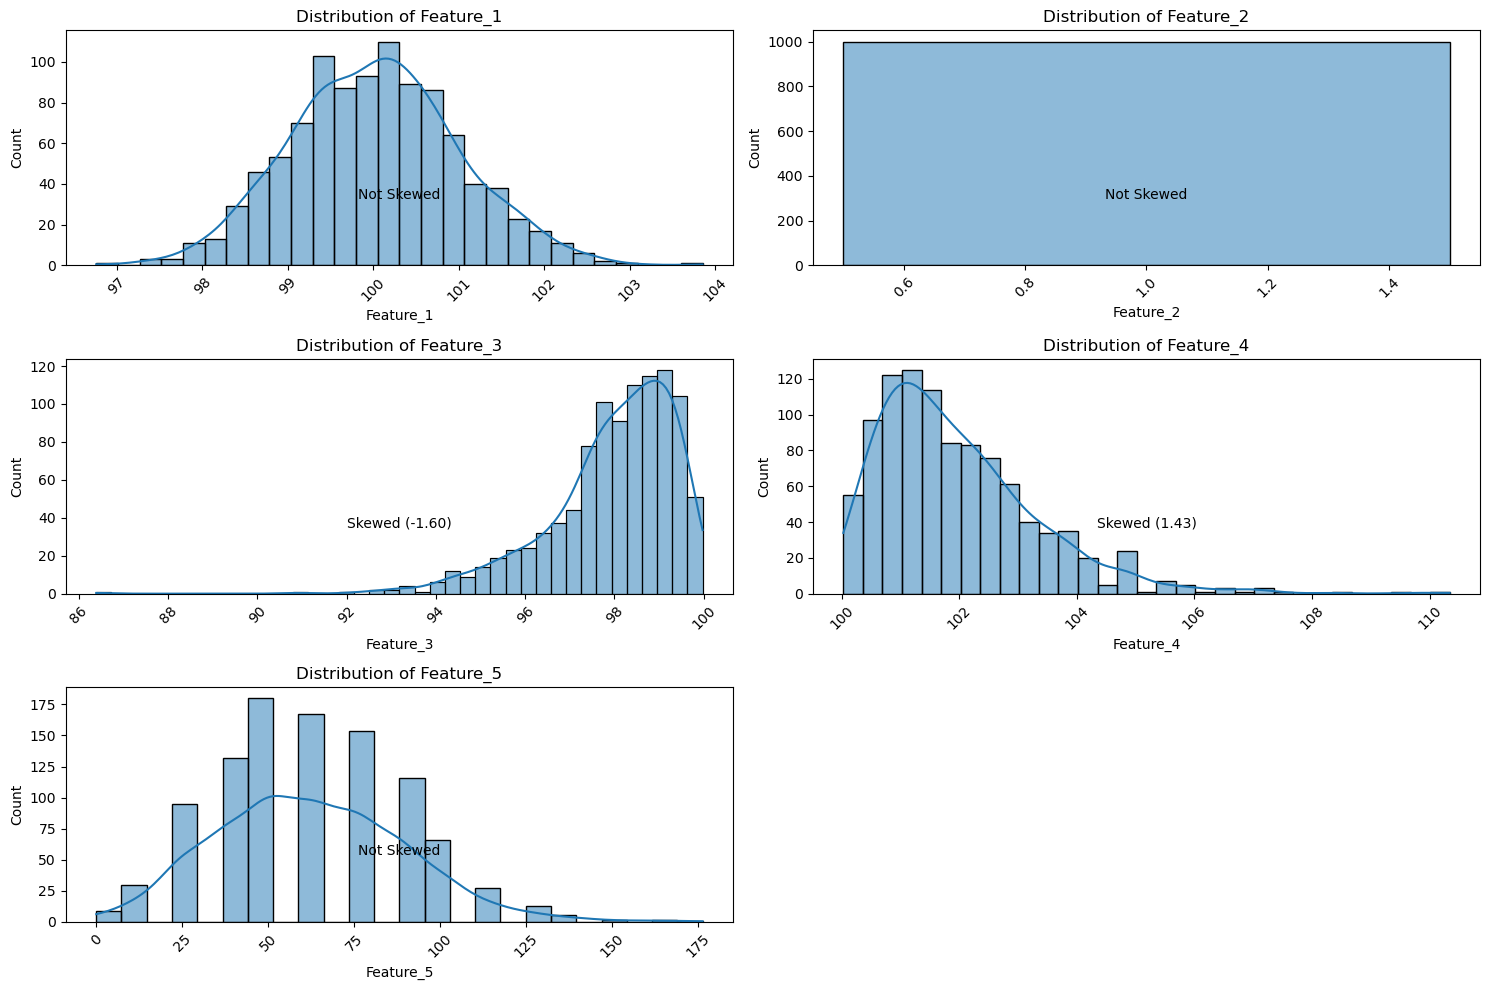

In [ ]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Check for skewness
    skewness = stats.skew(data[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Z-score

In [ ]:
# Function to detect outliers using Z-score for a specific column
def detect_outliers_z_score(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return outliers

#### Apply it on complete data

In [ ]:
# Detect outliers for each numeric column
outliers = detect_outliers_z_score(data[data.columns])

# Print indices of rows containing outliers
outlier_indices = data.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))


Index of rows with outliers: [34, 49, 174, 209, 255, 262, 345, 371, 390, 410, 427, 478, 566, 600, 603, 634, 638, 687, 754, 762, 771, 778, 779, 799, 806, 844, 877, 895, 959, 984]
Count of outliers: 30


### Let's explore the outliers in each column

**Feature 1**

In [ ]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(data[["Feature_1"]])
outlier_indices = data.index[outliers].tolist()
#print(f"Outliers in column '{column}': {outlier_indices}")
data.iloc[outlier_indices]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
209,103.852731,1.0,99.868503,100.978571,88.2
262,96.758733,1.0,99.062326,100.849835,37.8
478,103.078881,1.0,99.471858,100.710022,63.0


**Feature 2**

In [ ]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(data[["Feature_2"]])
outlier_indices = data.index[outliers].tolist()
data.iloc[outlier_indices]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5


**Feature 3**

In [ ]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(data[["Feature_3"]])
outlier_indices = data.index[outliers].tolist()
#print(f"Outliers in column '{column}': {outlier_indices}")
data.iloc[outlier_indices]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
174,100.276691,1.0,92.875542,101.008665,37.8
371,100.497998,1.0,93.040004,100.698867,100.8
390,99.101585,1.0,90.891185,101.289622,0.0
410,100.711615,1.0,92.827486,105.937283,50.4
427,100.686051,1.0,92.143957,102.467044,88.2
600,100.756989,1.0,86.389767,107.042339,88.2
762,102.560085,1.0,93.311653,100.887119,88.2
877,100.223788,1.0,93.344858,102.176570,88.2
895,100.648710,1.0,93.341657,102.275985,50.4
959,100.447709,1.0,92.533782,100.750100,25.2


**Feature 4**

In [ ]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(data[["Feature_4"]])
outlier_indices = data.index[outliers].tolist()
data.iloc[outlier_indices]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
34,100.822545,1.0,96.842818,107.374099,25.2
49,98.236960,1.0,98.987163,110.337932,88.2
566,97.961875,1.0,95.023379,106.283659,88.2
600,100.756989,1.0,86.389767,107.042339,88.2
638,98.710039,1.0,99.392434,108.354085,25.2
687,99.625179,1.0,99.091693,109.630237,63.0
754,99.050601,1.0,96.730516,107.054958,25.2
771,99.437533,1.0,97.680300,106.673474,63.0
778,99.925567,1.0,97.939519,107.062569,37.8
779,100.620672,1.0,99.311032,106.378470,75.6


**Feature 5**

In [ ]:
# Detect outliers for each numeric column separately
outliers = detect_outliers_z_score(data[["Feature_5"]])
outlier_indices = data.index[outliers].tolist()
data.iloc[outlier_indices]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
255,99.515766,1.0,98.063073,100.612635,151.2
345,100.232050,1.0,96.321519,101.987158,176.4
603,101.355638,1.0,98.823218,101.815205,163.8
634,98.987896,1.0,97.114772,101.635578,163.8
799,100.029756,1.0,99.094085,102.583899,151.2


In [ ]:
data[data["Feature_5"]<=151].sort_values(by="Feature_5",ascending=False)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
697,98.748886,1.0,97.269541,100.855669,138.6
379,99.191702,1.0,96.959092,101.874179,138.6
844,100.166452,1.0,98.627412,106.669370,138.6
852,99.362613,1.0,98.538148,101.097425,138.6
693,100.615936,1.0,98.927556,103.306992,138.6
...,...,...,...,...,...
932,98.551986,1.0,97.880638,100.378505,0.0
208,100.515048,1.0,98.753515,100.045783,0.0
477,100.311250,1.0,96.981040,100.551480,0.0
516,100.500917,1.0,98.729635,101.033186,0.0


#### Outliers

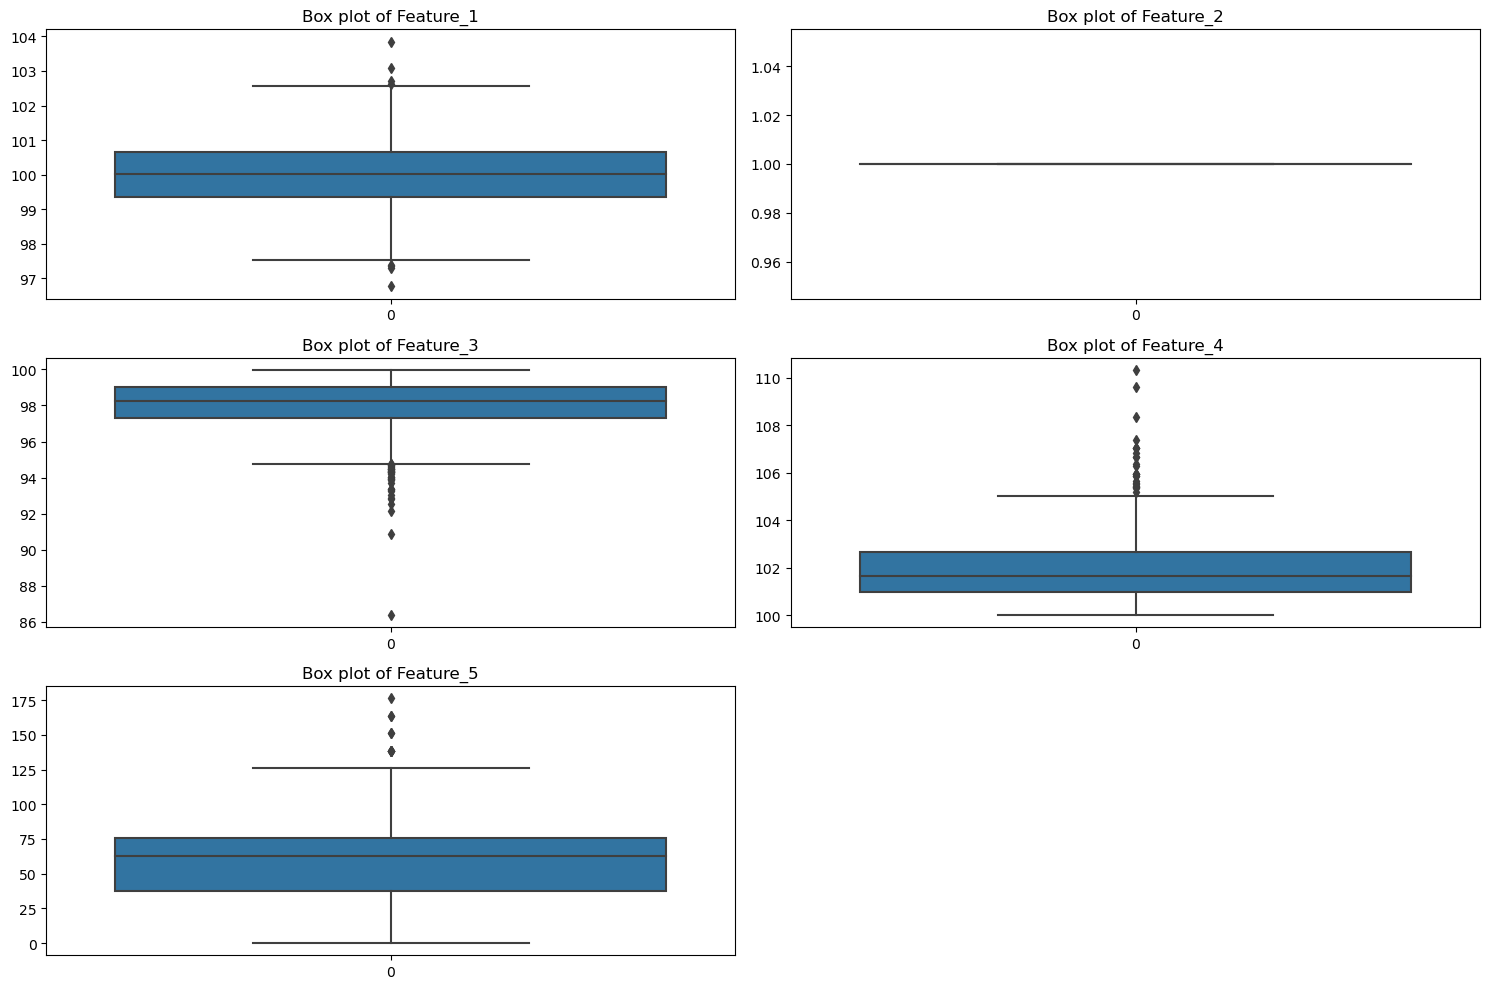

In [ ]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data[column])
    plt.title(f'Box plot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Remove outliers

In [ ]:
# Remove outliers based on Z-score for a specific column
def remove_outliers_z_score_column(data_column, threshold=3):
    z_scores = zscore(data_column)
    filtered_data = data_column[np.abs(z_scores) <= threshold]
    return filtered_data

In [ ]:
updated_data = remove_outliers_z_score_column(data)

updated_data["Feature_2"] = data["Feature_2"]


In [ ]:
# Detect outliers for each numeric column
outliers = detect_outliers_z_score(updated_data[updated_data.columns])

# Print indices of rows containing outliers
outlier_indices = updated_data.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))

Index of rows with outliers: [70, 73, 188, 198, 231, 391, 410, 415, 768, 829, 867, 901, 905, 990]
Count of outliers: 14


In [ ]:
updated_data.iloc[outlier_indices]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
70,100.361396,1.0,93.965794,103.863700,50.4
73,101.564644,1.0,94.311276,105.937303,50.4
188,99.153206,1.0,99.663502,105.856963,88.2
198,100.058209,1.0,97.603842,105.587190,63.0
231,100.216459,1.0,93.887413,101.186159,88.2
391,100.491919,1.0,96.154730,105.659494,88.2
410,100.711615,1.0,NaN,105.937283,50.4
415,99.251513,1.0,93.921977,101.862119,37.8
768,99.373033,1.0,99.285244,105.937609,25.2
829,99.718215,1.0,93.929302,101.578377,63.0


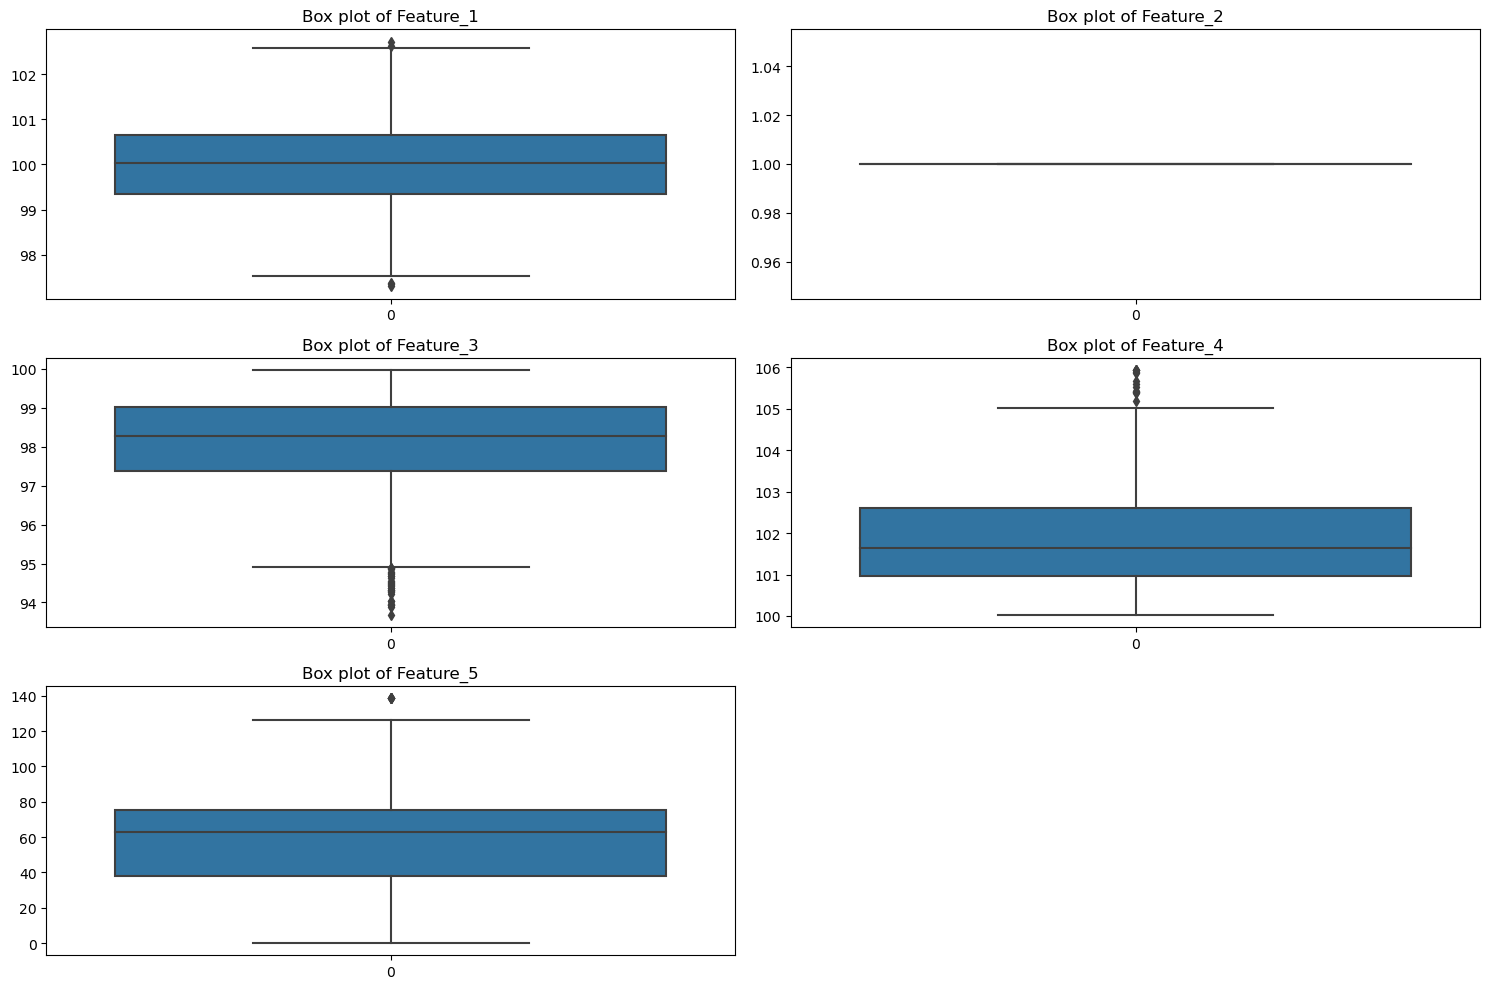

In [ ]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(updated_data.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(updated_data[column])
    plt.title(f'Box plot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Distribution Check

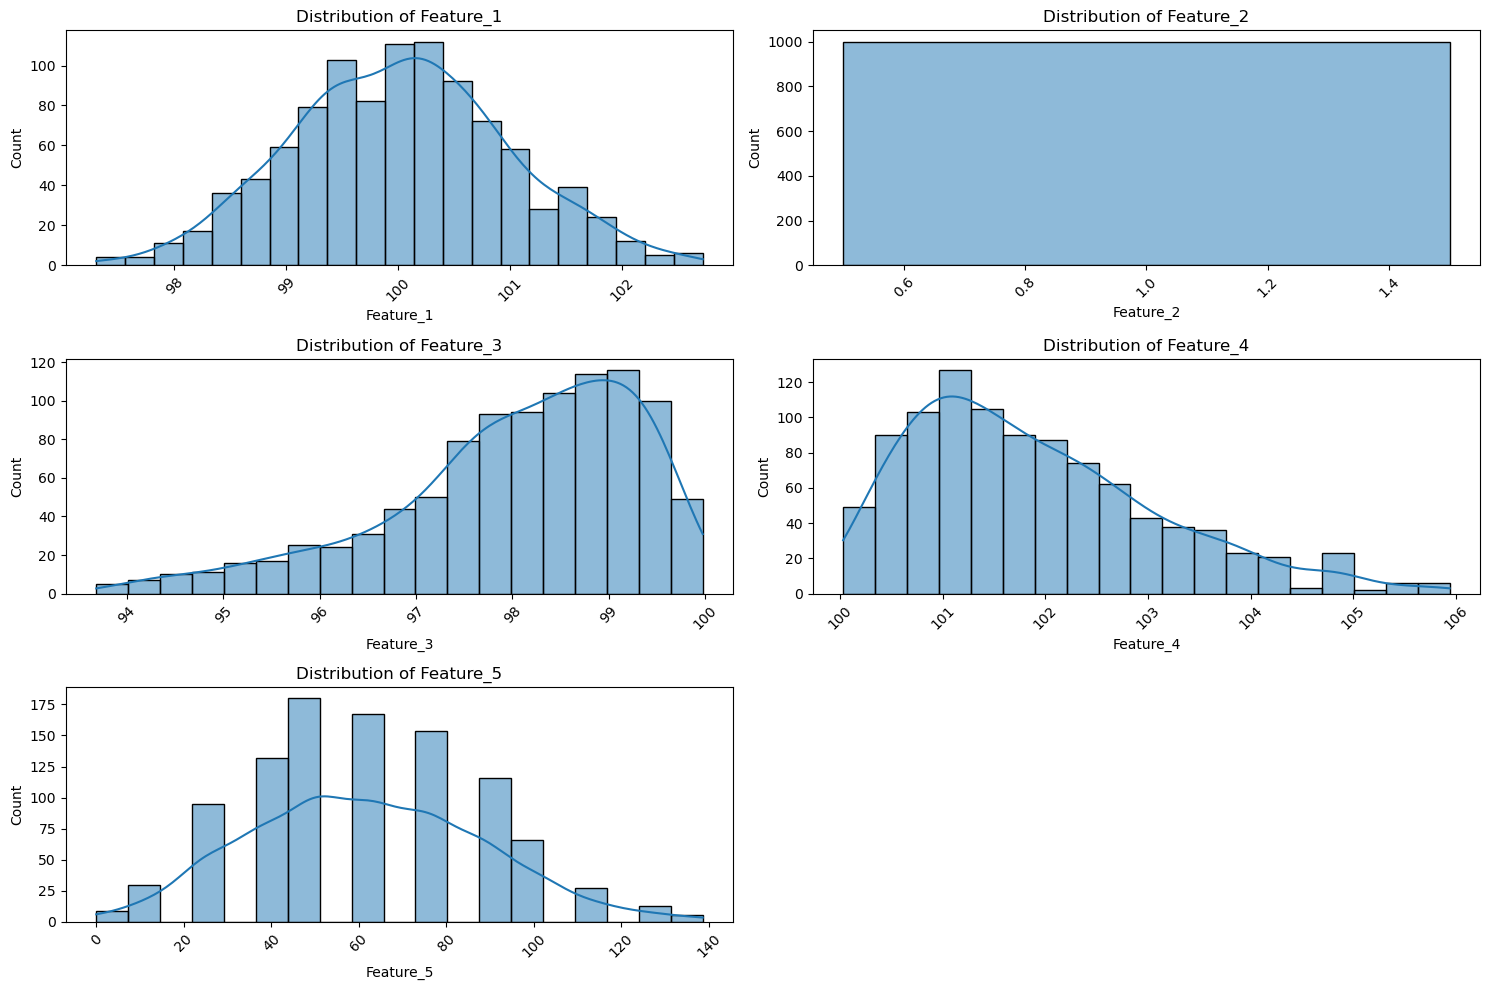

In [ ]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(updated_data.columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(updated_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Techniques to deal Skewness (Binning, and Data Segmentation)

In [ ]:
num_bins = 500

# Apply binning to Feature 3 and Feature 4
updated_data['Feature 3 Binned'] = pd.qcut(updated_data['Feature_3'], q=num_bins, labels=False)
updated_data['Feature 4 Binned'] = pd.qcut(updated_data['Feature_4'], q=num_bins, labels=False)

# Display the first few rows of the dataset with binned features
updated_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature 3 Binned,Feature 4 Binned
0,100.496714,1.0,98.701499,100.448329,25.2,318.0,41.0
1,99.861736,1.0,99.127991,102.162850,25.2,390.0,323.0
2,100.647689,1.0,98.180381,105.513263,75.6,235.0,496.0
3,101.523030,1.0,98.042669,100.718009,63.0,216.0,82.0
4,99.765847,1.0,99.127834,100.362979,37.8,389.0,27.0


In [ ]:
updated_data['Feature 4 Binned'].value_counts().sort_index()

Feature 4 Binned
0.0      2
1.0      2
2.0      2
3.0      2
4.0      2
        ..
495.0    2
496.0    2
497.0    2
498.0    2
499.0    2
Name: count, Length: 500, dtype: int64

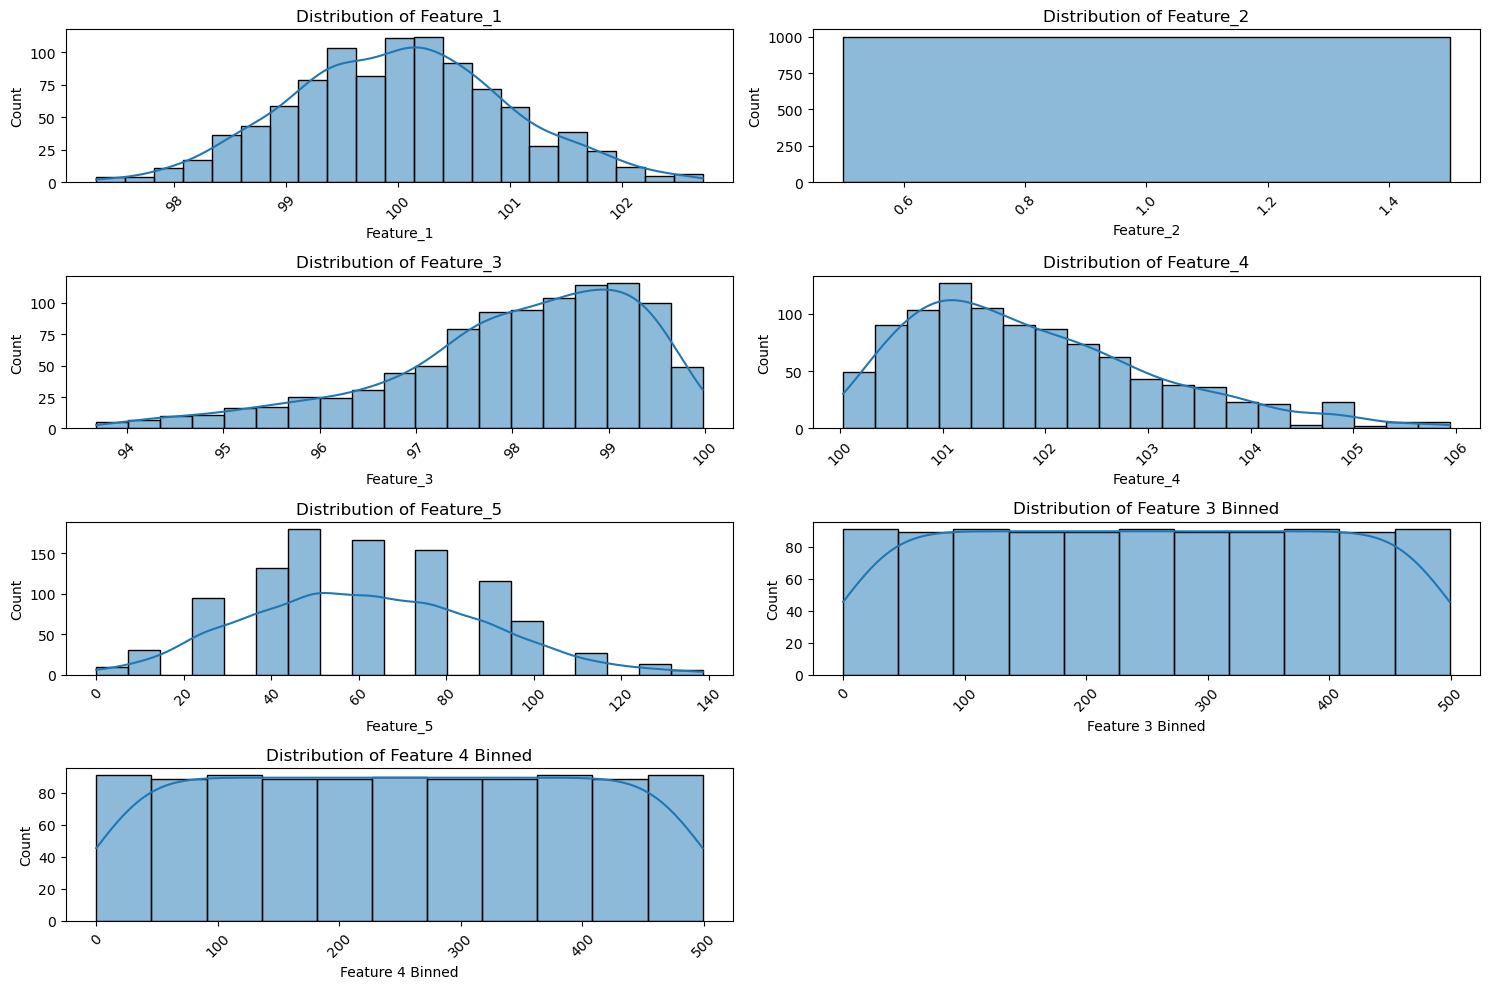

In [ ]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(updated_data.columns):
    plt.subplot(4, 2, i+1)
    sns.histplot(updated_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Drop the skewed columns Feature 3 and Feature 4

In [ ]:
updated_data.drop(["Feature_3","Feature_4"],axis=1,inplace=True)

In [ ]:
updated_data.columns

Index(['Feature_1', 'Feature_2', 'Feature_5', 'Feature 3 Binned',
       'Feature 4 Binned'],
      dtype='object')

#### Rename the columns

In [ ]:
updated_data.rename(columns={"Feature 3 Binned": "Feature_3", "Feature 4 Binned": "Feature_4"},inplace=True)

In [ ]:
updated_data.columns

Index(['Feature_1', 'Feature_2', 'Feature_5', 'Feature_3', 'Feature_4'], dtype='object')

### Standardization and Normalization

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
updated_data.head()

,Feature_1,Feature_2,Feature_5,Feature_3,Feature_4
0,100.496714,1.0,25.2,318.0,41.0
1,99.861736,1.0,25.2,390.0,323.0
2,100.647689,1.0,75.6,235.0,496.0
3,101.523030,1.0,63.0,216.0,82.0
4,99.765847,1.0,37.8,389.0,27.0


## Standardization

In [ ]:
scaler_std = StandardScaler()
updated_data["Feature_1_standardized"] = scaler_std.fit_transform(updated_data[["Feature_1"]])

In [ ]:
# using z-score formula = (value - mean)/ std
#updated_data["Feature_1_standardized"] = (updated_data["Feature_1"] - updated_data["Feature_1"].mean()) / updated_data["Feature_1"].std()

In [ ]:
round(updated_data["Feature_1_standardized"].mean())

0

In [ ]:
round(updated_data["Feature_1_standardized"].std())

1

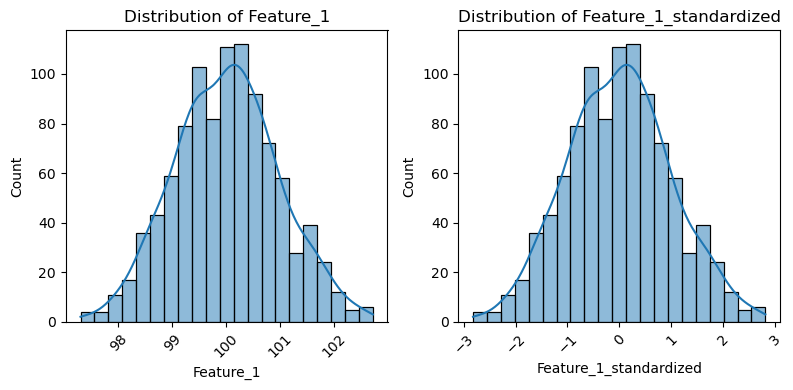

In [ ]:
numerical_columns = ["Feature_1","Feature_1_standardized"]

plt.figure(figsize=(8, 4))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, 2, i+1)
    sns.histplot(updated_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# drop the previous column
updated_data.drop(["Feature_1"],axis=1,inplace=True)

In [ ]:
#rename the column for readability
updated_data.rename(columns={"Feature_1_standardized":"Feature_1"},inplace=True)

## Normalization

In [ ]:
Normalization = MinMaxScaler()
updated_data["Feature_5_Normalized"] = Normalization.fit_transform(updated_data[["Feature_5"]])

In [ ]:
updated_data["Feature_5_Normalized"].min()

0.0

In [ ]:
updated_data["Feature_5_Normalized"].max()

1.0

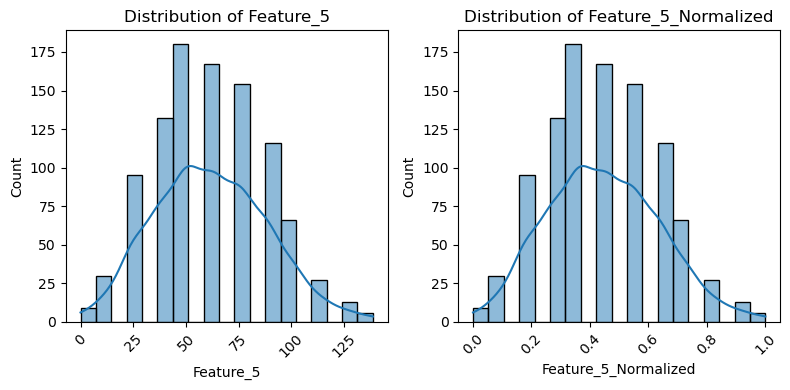

In [ ]:
import seaborn as sns
from scipy import stats
numerical_columns = ["Feature_5","Feature_5_Normalized"]

plt.figure(figsize=(8, 4))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, 2, i+1)
    sns.histplot(updated_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# drop the previous column
updated_data.drop(["Feature_5"],axis=1,inplace=True)

In [ ]:
updated_data.rename(columns={"Feature_5_Normalized":"Feature_5"},inplace=True)

# Let's normalize the other columns

In [ ]:
updated_data.columns

Index(['Feature_2', 'Feature_3', 'Feature_4', 'Feature_1', 'Feature_5'], dtype='object')

In [ ]:
numerical_columns = ['Feature_2', 'Feature_3', 'Feature_4']

for col in numerical_columns:
    updated_data[col] = Normalization.fit_transform(updated_data[[col]])



In [ ]:
updated_data.columns

Index(['Feature_2', 'Feature_3', 'Feature_4', 'Feature_1', 'Feature_5'], dtype='object')

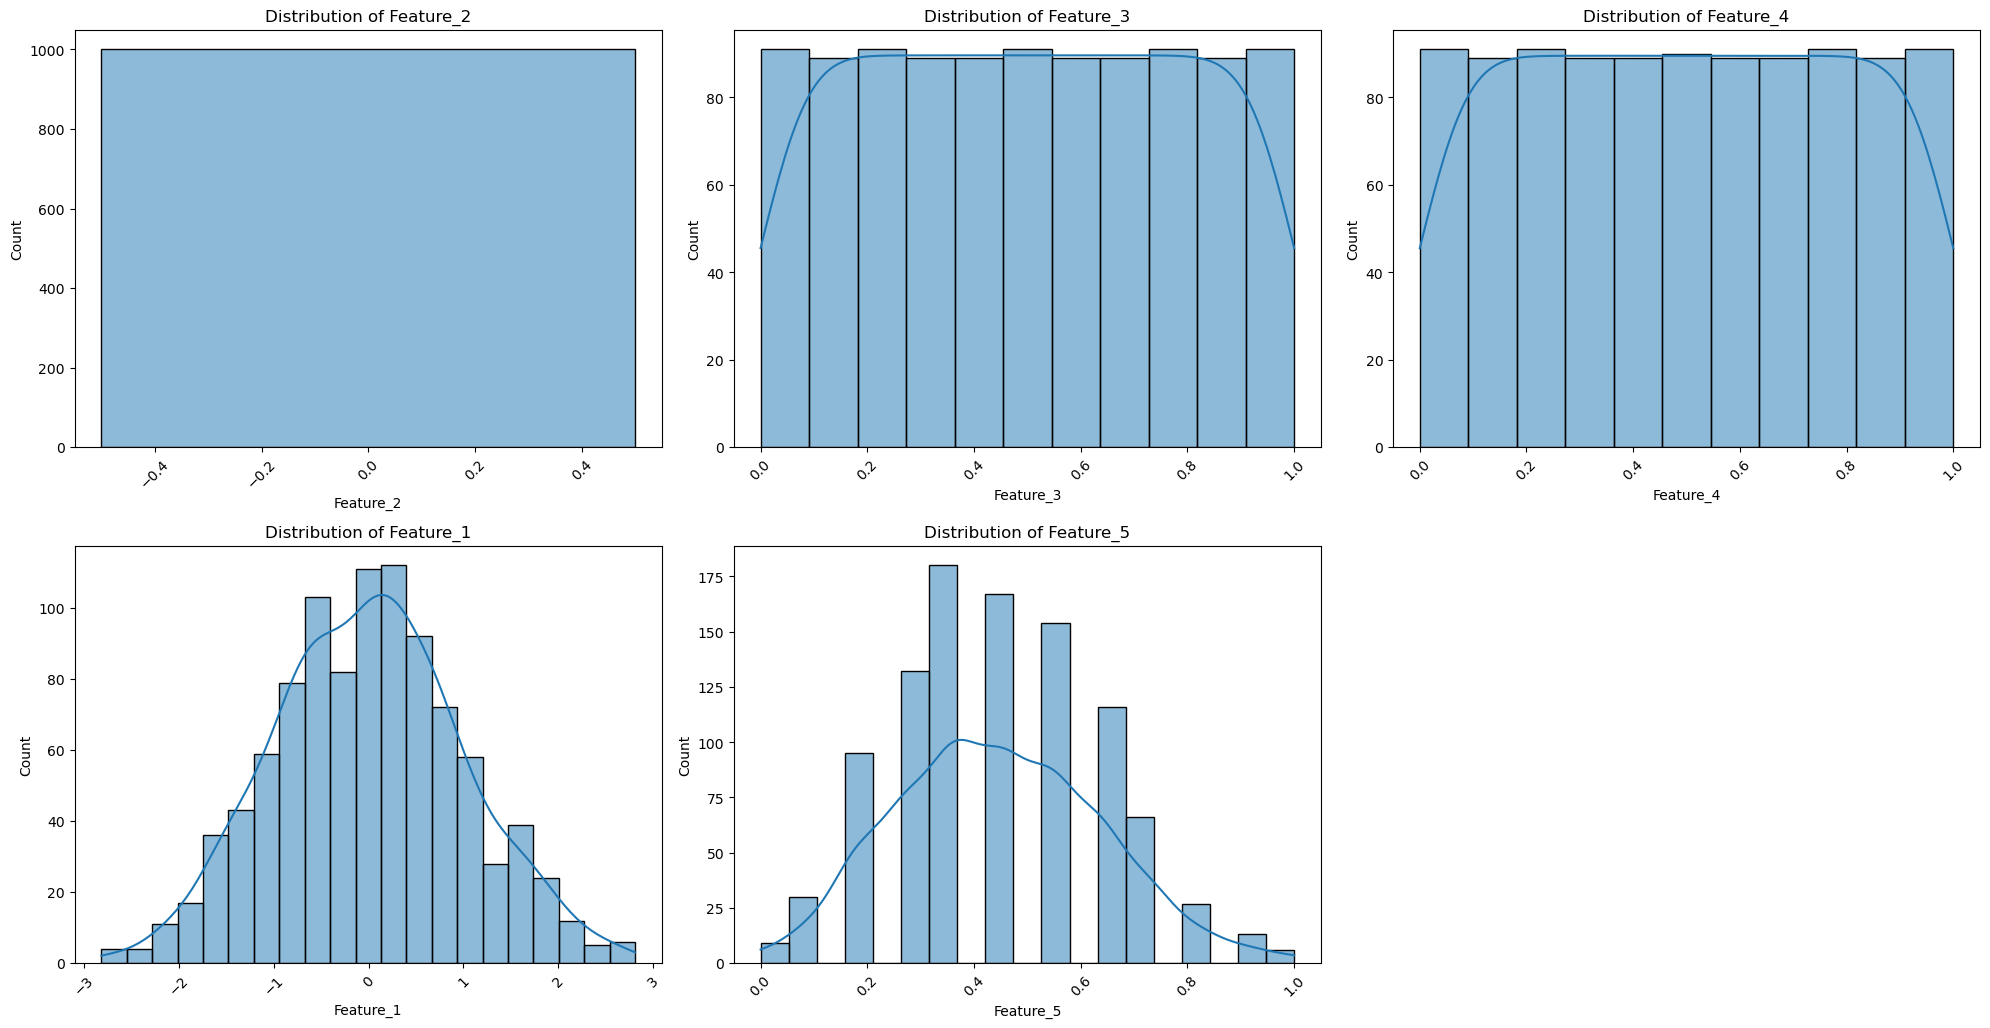

In [ ]:
plt.figure(figsize=(20, 15))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(updated_data.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(updated_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()